In [202]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

In [203]:
pd.set_option('display.max_columns',None)

In [204]:
df = pd.read_csv("../data/total-sample-deal-PSM_add_similarity.csv")
df.head()

,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity
0,1994,1994,23778,10173,023778_010173_1995-06-16,TX,0.939510,0.039785,0.190418,-0.600000,0.247123,4.850944,76632.0,FL,0.794892,0.041354,0.582252,0.448980,0.237958,4.124809,57963.0,1,6/16/95,23778,10173,1994-023778-010173,1993-023778-010173,NaN,NaN,NaN
1,1994,1994,14923,2416,014923_002416_1995-12-22,CO,1.417725,0.055939,0.190765,0.608696,0.064204,3.962925,12199.0,LA,1.175135,0.007795,0.404339,0.250000,0.253290,3.046330,19394.0,1,12/22/95,14923,2416,1994-014923-002416,1993-014923-002416,NaN,NaN,NaN
2,1994,1993,29077,12829,029077_012829_1995-01-04,CA,1.201676,0.095610,0.176620,-0.447059,0.265840,3.924801,79739.0,NY,1.187786,-0.125503,0.419946,-0.483871,0.091378,2.009287,75504.0,1,1/4/95,29077,12829,1994-029077-012829,1993-029077-012829,NaN,NaN,NaN
3,1994,1994,28259,8126,028259_008126_1995-01-12,NY,1.763769,-0.026707,0.208224,0.026667,0.234810,7.062973,79220.0,CT,1.142035,0.016959,0.444123,-0.053067,0.690825,6.144683,44863.0,1,1/12/95,28259,8126,1994-028259-008126,1993-028259-008126,NaN,NaN,NaN
4,1994,1993,1311,14232,001311_014232_1995-01-19,MI,1.301060,0.225934,0.073056,0.073276,0.319689,5.651524,85033.0,CO,1.416327,0.089724,0.002799,0.333333,0.208157,3.264576,10965.0,1,1/19/95,1311,14232,1994-001311-014232,1993-001311-014232,NaN,NaN,NaN


In [205]:
len(df)

21859

In [206]:
df['deal'].value_counts()

0    18879
1     2980
Name: deal, dtype: int64

## missing values

In [207]:
df.isnull().sum()

acq_FYEAR               0
target_FYEAR            0
acq_gvkey               0
target_gvkey            0
dealID                  0
acq_STATE            2260
acq_salegr           1923
acq_profit           1898
acq_mleverage        1899
acq_pastret          1912
acq_io_top5          1895
acq_size             1895
acq_PERMNO           1895
target_STATE         2529
target_salegr        2357
target_profit        2333
target_mleverage     2341
target_pastret       2346
target_io_top5       2324
target_size          2333
target_PERMNO        2324
deal                    0
Date_Announced          0
acquirer_gvkey2         0
target_gvkey2           0
search_key1             0
search_key2             0
HPs_similarity      12938
RWMD_similarity      6717
LDA_similarity      12626
dtype: int64

In [209]:
#convert to datetime and filter
df['Date_Announced']=pd.to_datetime(df['Date_Announced'])

In [210]:
df1=df[df['Date_Announced']>pd.datetime(1996,12,31)]
df1 = df1[df1['Date_Announced']<pd.datetime(2017,1,1)]

In [212]:
df1.isnull().sum()

acq_FYEAR               0
target_FYEAR            0
acq_gvkey               0
target_gvkey            0
dealID                  0
acq_STATE            1991
acq_salegr           1662
acq_profit           1640
acq_mleverage        1642
acq_pastret          1653
acq_io_top5          1638
acq_size             1638
acq_PERMNO           1638
target_STATE         2015
target_salegr        1835
target_profit        1822
target_mleverage     1830
target_pastret       1830
target_io_top5       1813
target_size          1822
target_PERMNO        1813
deal                    0
Date_Announced          0
acquirer_gvkey2         0
target_gvkey2           0
search_key1             0
search_key2             0
HPs_similarity      11165
RWMD_similarity      4815
LDA_similarity      10704
dtype: int64

In [213]:
len(df1)

19928

In [214]:
#remove acq and target with missing values
df2 = df1.dropna(how='any', subset=['acq_PERMNO','target_PERMNO'])

In [215]:
len(df2)

16477

In [216]:
df2.isnull().sum()

acq_FYEAR              0
target_FYEAR           0
acq_gvkey              0
target_gvkey           0
dealID                 0
acq_STATE            309
acq_salegr            24
acq_profit             2
acq_mleverage          4
acq_pastret           15
acq_io_top5            0
acq_size               0
acq_PERMNO             0
target_STATE         158
target_salegr         22
target_profit          9
target_mleverage      17
target_pastret        17
target_io_top5         0
target_size            9
target_PERMNO          0
deal                   0
Date_Announced         0
acquirer_gvkey2        0
target_gvkey2          0
search_key1            0
search_key2            0
HPs_similarity      8963
RWMD_similarity     3607
LDA_similarity      8535
dtype: int64

In [183]:
#df2[df2['acq_STATE'].isnull()]

In [217]:
#fill missing values
df2['acq_salegr'].fillna(df2['acq_salegr'].median(),inplace = True)
df2['acq_profit'].fillna(df2['acq_profit'].median(),inplace = True)
df2['acq_mleverage'].fillna(df2['acq_mleverage'].median(),inplace = True)
df2['acq_pastret'].fillna(df2['acq_pastret'].median(),inplace = True)
df2['target_salegr'].fillna(df2['target_salegr'].median(),inplace = True)
df2['target_profit'].fillna(df2['target_profit'].median(),inplace = True)
df2['target_mleverage'].fillna(df2['target_mleverage'].median(),inplace = True)
df2['target_pastret'].fillna(df2['target_pastret'].median(),inplace = True)
df2['target_size'].fillna(df2['target_size'].median(),inplace = True)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [218]:
df2.isnull().sum()

acq_FYEAR              0
target_FYEAR           0
acq_gvkey              0
target_gvkey           0
dealID                 0
acq_STATE            309
acq_salegr             0
acq_profit             0
acq_mleverage          0
acq_pastret            0
acq_io_top5            0
acq_size               0
acq_PERMNO             0
target_STATE         158
target_salegr          0
target_profit          0
target_mleverage       0
target_pastret         0
target_io_top5         0
target_size            0
target_PERMNO          0
deal                   0
Date_Announced         0
acquirer_gvkey2        0
target_gvkey2          0
search_key1            0
search_key2            0
HPs_similarity      8963
RWMD_similarity     3607
LDA_similarity      8535
dtype: int64

In [219]:
#add state_match
def state_match(x,y):
    if (pd.isna(x)) or (pd.isna(y)):# if nan random fill it
        return np.random.choice([True, False])
    elif(pd.notna(x) and pd.notna(y) and (x!=y)): 
        return False
    elif(pd.notna(x) and pd.notna(y) and (x==y)):
         return True                    

df2['state_match'] = df2.apply(lambda row: state_match(row['acq_STATE'], row['target_STATE']),axis=1)
df2

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity,state_match
347,1996,1996,25495,23743,025495_023743_1997-02-18,TX,1.980444,0.027066,0.221037,1.627930,0.042639,8.339694,81594.0,TX,0.900882,0.037337,0.057868,0.136364,0.100922,7.043287,76593.0,1,1997-02-18,25495,23743,1996-025495-023743,1995-025495-023743,NaN,NaN,NaN,True
379,1996,1996,1976,8517,001976_008517_1997-02-26,TX,1.147970,0.053482,0.133323,0.517013,0.253640,8.100887,75034.0,MO,0.988561,0.063068,0.106269,0.423754,0.215980,5.709721,62384.0,1,1997-02-26,1976,8517,1996-001976-008517,1995-001976-008517,NaN,0.487075,NaN,False
383,1996,1996,16766,17018,016766_017018_1997-02-13,NH,1.692686,0.008171,0.545954,0.082930,0.049167,7.344132,11120.0,NH,1.021503,0.021935,0.000000,-0.014896,0.177036,5.604216,11921.0,1,1997-02-13,16766,17018,1996-016766-017018,1995-016766-017018,0.2267,0.542035,1.000000,True
388,1996,1996,28994,14126,028994_014126_1997-04-03,SC,1.848127,0.018818,0.247289,0.168831,0.333854,6.199295,79701.0,CA,1.953173,0.209476,0.000000,0.913067,0.040700,3.769883,75251.0,1,1997-04-03,28994,14126,1996-028994-014126,1995-028994-014126,NaN,NaN,NaN,False
412,1996,1996,61058,2304,061058_002304_1997-01-07,OK,1.168392,0.037616,0.206753,0.142857,0.063638,4.863225,81859.0,OK,1.208697,-0.013772,0.126423,0.478571,0.000000,2.333211,18738.0,1,1997-01-07,61058,2304,1996-061058-002304,1995-061058-002304,NaN,0.638155,0.647508,True
413,1996,1996,25138,3289,025138_003289_1997-01-07,TX,1.103781,0.026641,0.000000,-0.608392,0.194350,4.717632,77505.0,CA,0.777861,-0.225408,0.151568,-0.390000,0.201034,4.105120,25604.0,1,1997-01-07,25138,3289,1996-025138-003289,1995-025138-003289,0.1144,NaN,NaN,False
414,1996,1996,29356,62834,029356_062834_1997-01-13,CA,1.498319,0.204390,0.000000,0.963816,0.279692,3.866837,80055.0,CA,1.613852,-0.011605,0.002685,-0.309859,0.092065,3.783007,83542.0,1,1997-01-13,29356,62834,1996-029356-062834,1995-029356-062834,0.1137,0.813304,0.204321,True
415,1996,1996,27747,12232,027747_012232_1997-01-13,CA,1.907900,-0.092917,0.056090,-0.087500,0.310244,4.603258,78815.0,CA,0.000000,-1.068043,0.011826,0.676471,0.270589,2.963725,10328.0,1,1997-01-13,27747,12232,1996-027747-012232,1995-027747-012232,0.0954,NaN,NaN,True
416,1996,1996,2051,29373,002051_029373_1997-01-14,FL,1.037031,0.013691,0.280167,0.437741,0.115589,10.626955,61284.0,NY,1.239438,0.012452,0.800840,0.309859,0.185577,7.326902,80009.0,1,1997-01-14,2051,29373,1996-002051-029373,1995-002051-029373,NaN,NaN,NaN,False
417,1996,1996,6304,27919,006304_027919_1997-01-14,CA,1.570619,0.169597,0.002621,-0.398058,0.346431,6.569162,46886.0,CA,1.220998,0.126519,0.034763,0.082051,0.264825,6.182950,79015.0,1,1997-01-14,6304,27919,1996-006304-027919,1995-006304-027919,0.1206,0.764627,NaN,True


In [220]:
df2['state_match'].value_counts()

False    14038
True      2439
Name: state_match, dtype: int64

In [188]:
#df1['state_match'].fillna(pd.Series(np.random.choice([True, False], p=[0.15,0.85], size=len(df1))), inplace =True)

In [222]:
df2['state_match']=df2['state_match'].astype(int)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 1440x648 with 0 Axes>

Text(0.5,1,'HPs_similarity')

Text(0.5,1,'RWMD_similarity')

Text(0.5,1,'LDA_similarity')

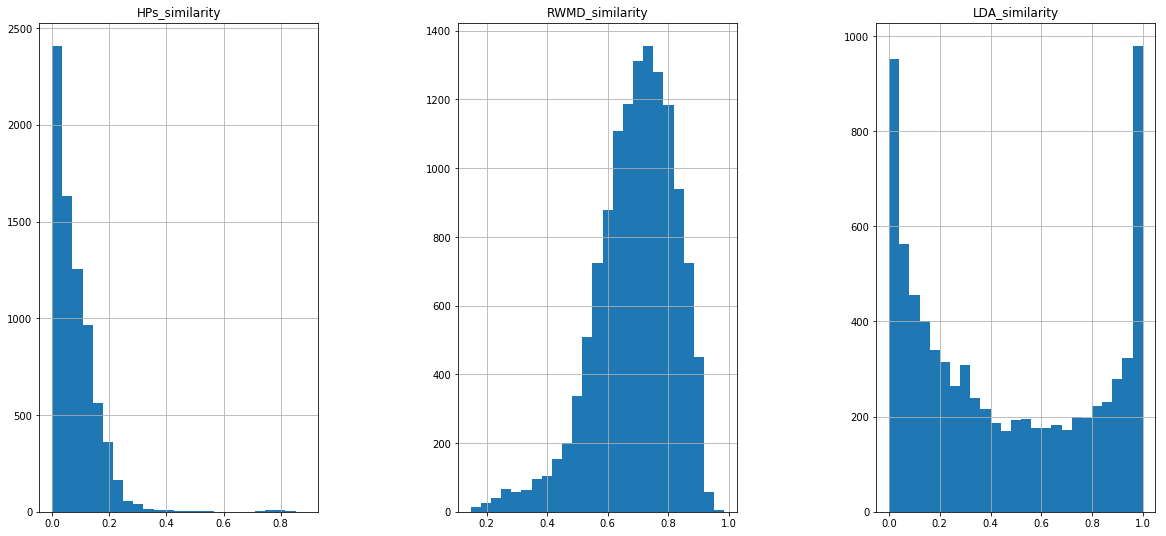

In [223]:
#similarity distribution
%matplotlib inline
plt.figure(figsize=(20,9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(1,3,1)
plt.title("HPs_similarity")
df2['HPs_similarity'].hist(bins=25)
plt.subplot(1,3,2)
plt.title("RWMD_similarity")
df2['RWMD_similarity'].hist(bins=25)
plt.subplot(1,3,3)
plt.title("LDA_similarity")
df2['LDA_similarity'].hist(bins=25)


In [224]:
#version1 remove missing valus for similarity
df3 = df2.dropna(how='any', subset=['HPs_similarity','RWMD_similarity','LDA_similarity'])
len(df3)
df3.columns

4791

Index(['acq_FYEAR', 'target_FYEAR', 'acq_gvkey', 'target_gvkey', 'dealID',
       'acq_STATE', 'acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'acq_PERMNO', 'target_STATE',
       'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'target_PERMNO', 'deal',
       'Date_Announced', 'acquirer_gvkey2', 'target_gvkey2', 'search_key1',
       'search_key2', 'HPs_similarity', 'RWMD_similarity', 'LDA_similarity',
       'state_match'],
      dtype='object')

In [225]:
df3['deal'].value_counts()

0    3673
1    1118
Name: deal, dtype: int64

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.676062,'0.66')

Text(1,0.689758,'0.67')

Text(2,0.695568,'0.68')

Text(3,0.707403,'0.69')

([<matplotlib.axis.XTick at 0x1a28739128>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for HPs_similarity')

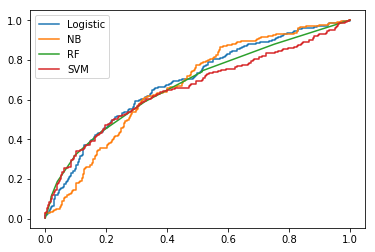

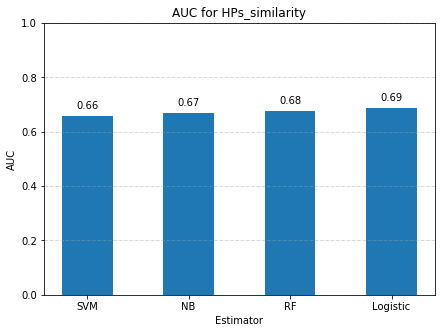

In [238]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df3columns=df3[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'HPs_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df3columns,
                                                    df3.deal, test_size=0.2,stratify = df3.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for HPs_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.647478,'0.63')

Text(1,0.68872,'0.67')

Text(2,0.694411,'0.67')

Text(3,0.710576,'0.69')

([<matplotlib.axis.XTick at 0x1a2870b908>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for RWMD_similarity')

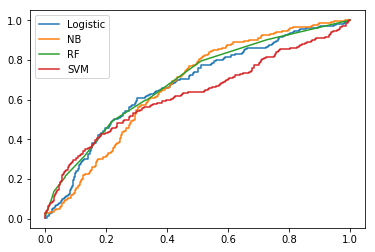

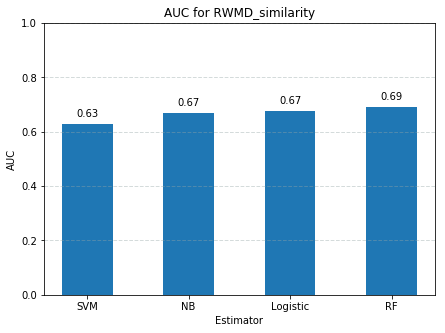

In [239]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df3columns=df3[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'RWMD_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df3columns,
                                                    df3.deal, test_size=0.2,stratify = df3.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for RWMD_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.645067,'0.63')

Text(1,0.687201,'0.67')

Text(2,0.688641,'0.67')

Text(3,0.697873,'0.68')

([<matplotlib.axis.XTick at 0x1a283ef940>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for LDA_similarity')

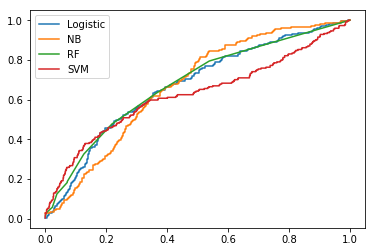

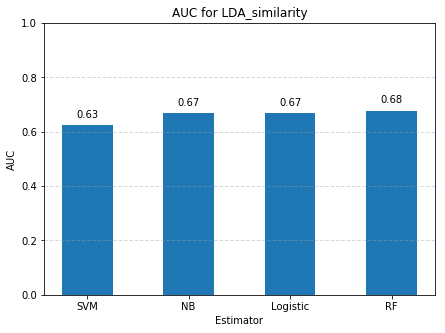

In [240]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df3columns=df3[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'LDA_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df3columns,
                                                    df3.deal, test_size=0.2,stratify = df3.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for LDA_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

## fillna = 0 for similarity

In [233]:
df4=df2.copy()
#'HPs_similarity', 'RWMD_similarity', 'LDA_similarity'
df4['HPs_similarity'].fillna(0,inplace = True)
df4['RWMD_similarity'].fillna(0,inplace = True)
df4['LDA_similarity'].fillna(0,inplace = True)

In [234]:
df4['deal'].value_counts()

0    13932
1     2545
Name: deal, dtype: int64

### baseline(no similarity)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.61308,'0.59')

Text(1,0.620017,'0.60')

Text(2,0.634844,'0.61')

Text(3,0.669771,'0.65')

([<matplotlib.axis.XTick at 0x1a26b78c18>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for baseline')

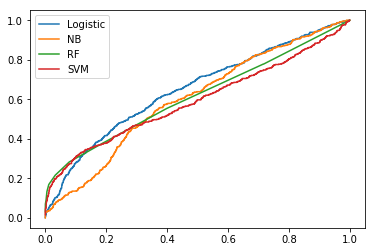

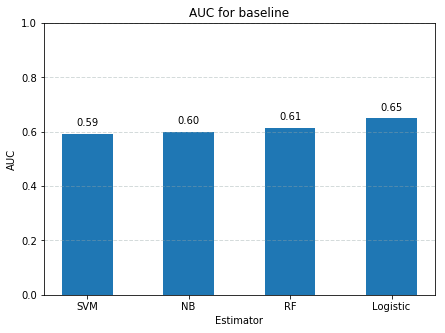

In [260]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df4_rwmd=df4[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'state_match']]
X_train, X_test, y_train, y_test = train_test_split(df4_rwmd,
                                                    df4.deal, test_size=0.2,stratify = df4.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for baseline')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

### add RWMD_similarity

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.630756,'0.61')

Text(1,0.659061,'0.64')

Text(2,0.671543,'0.65')

Text(3,0.680778,'0.66')

([<matplotlib.axis.XTick at 0x1a290188d0>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for RWMD_similarity')

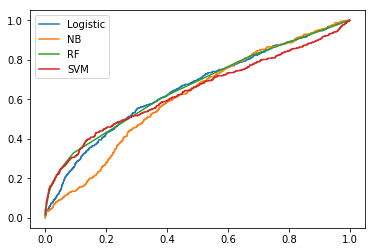

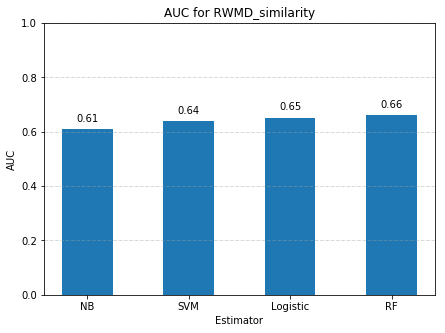

In [244]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df4_rwmd=df4[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'RWMD_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df4_rwmd,
                                                    df4.deal, test_size=0.2,stratify = df4.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for RWMD_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

### add LDA_similarity

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.638545,'0.62')

Text(1,0.640166,'0.62')

Text(2,0.64516,'0.63')

Text(3,0.699696,'0.68')

([<matplotlib.axis.XTick at 0x1a226136a0>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for LDA_similarity')

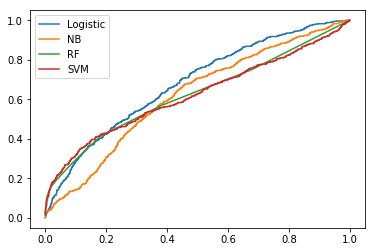

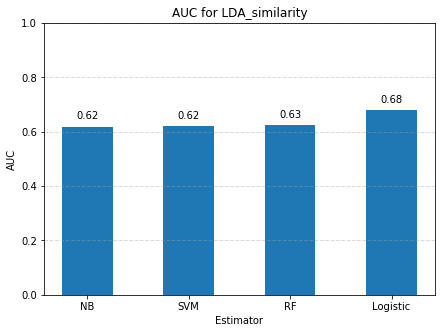

In [246]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df4_lda=df4[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'LDA_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df4_lda,
                                                    df4.deal, test_size=0.2,stratify = df4.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for LDA_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

### add HPs_similarity

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

(0, 1)

Text(0,0.643692,'0.62')

Text(1,0.726171,'0.71')

Text(2,0.729348,'0.71')

Text(3,0.743327,'0.72')

([<matplotlib.axis.XTick at 0x1a298cf908>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC for HPs_similarity')

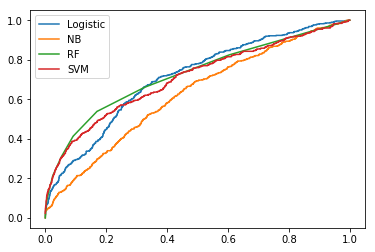

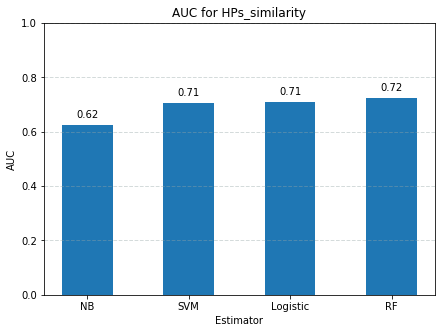

In [245]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(), SVC(probability=True) ]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'SVM'])
errvals = np.array([])
df4_hps=df4[['acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'HPs_similarity','state_match']]
X_train, X_test, y_train, y_test = train_test_split(df4_hps,
                                                    df4.deal, test_size=0.2,stratify = df4.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC for HPs_similarity')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

### logit  regression 

### lda

In [252]:
import statsmodels.api as sm
x2 = sm.add_constant(df4_lda)
est_lda = sm.Logit(df4.deal,x2).fit()
est_lda.params.values

Optimization terminated successfully.
         Current function value: 0.402900
         Iterations 8


array([-3.46076767,  0.25127163, -0.25160372, -0.53594671,  0.19644615,
       -0.27686899,  0.09998059,  0.15452583, -0.32471105,  0.24548305,
        0.00597852,  0.42806322,  0.00576921,  0.8461417 ,  1.12868857])

In [256]:
est_lda.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   8.0000    
Dependent Variable: deal             Pseudo R-squared: 0.064     
Date:               2018-07-17 13:40 AIC:              13307.1553
No. Observations:   16477            BIC:              13422.8011
Df Model:           14               Log-Likelihood:   -6638.6   
Df Residuals:       16462            LL-Null:          -7091.1   
Converged:          1.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -3.4608   0.1404 -24.6423 0.0000 -3.7360 -3.1855
acq_salegr        0.2513   0.0363   6.9166 0.0000  0.1801  0.3225
acq_profit       -0.2516   0.1634  -1.5397 0.1236 -0.5719  0.0687
acq_mleverage    -0.5359   0.1211  -4.4248 0.0000 -0.7733 -0.2985
acq_pastret       0.1964   0.0341   5.7610 0.0000  0.1296  0.2633
acq_io_top5      -0.2769   0.2102  -1.3169 0.1879 -0.6889  0.1352
acq_size          0.1000   0.0169   5.9104 0.0000  0.0668  0.1331
target_salegr     0.1545   0.0322   4.8025 0.0000  0.0915  0.2176
target_profit    -0.3247   0.1024  -3.1725 0.0015 -0.5253 -0.1241
target_mleverage  0.2455   0.1077   2.2785 0.0227  0.0343  0.4566
target_pastret    0.0060   0.0330   0.1811 0.8563 -0.0587  0.0707
target_io_top5    0.4281   0.1783   2.4002 0.0164  0.0785  0.7776
target_size       0.0058   0.0199   0.2897 0.7720 -0.0333  0.0448
LDA_similarity    0.8461   0.0615  13.7504 0.0000  0.7255  0.9667
state_match       1.1287   0.0518  21.7986 0.0000  1.0272  1.2302
=================================================================

"""

### rwmd

In [258]:
x2 = sm.add_constant(df4_rwmd)
est_rwmd = sm.Logit(df4.deal,x2).fit()
est_rwmd.params.values
est_rwmd.summary2()

Optimization terminated successfully.
         Current function value: 0.408322
         Iterations 8


array([-3.15244236,  0.24430025, -0.32282742, -0.41693799,  0.2029203 ,
       -0.33186198,  0.08576406,  0.15606212, -0.33157749,  0.29520776,
        0.01467466,  0.25858355,  0.02004862, -0.1131583 ,  1.15955168])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   8.0000    
Dependent Variable: deal             Pseudo R-squared: 0.051     
Date:               2018-07-17 13:40 AIC:              13485.8454
No. Observations:   16477            BIC:              13601.4912
Df Model:           14               Log-Likelihood:   -6727.9   
Df Residuals:       16462            LL-Null:          -7091.1   
Converged:          1.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -3.1524   0.1434 -21.9907 0.0000 -3.4334 -2.8715
acq_salegr        0.2443   0.0359   6.8042 0.0000  0.1739  0.3147
acq_profit       -0.3228   0.1612  -2.0026 0.0452 -0.6388 -0.0069
acq_mleverage    -0.4169   0.1190  -3.5030 0.0005 -0.6502 -0.1837
acq_pastret       0.2029   0.0341   5.9559 0.0000  0.1361  0.2697
acq_io_top5      -0.3319   0.2082  -1.5937 0.1110 -0.7400  0.0763
acq_size          0.0858   0.0166   5.1523 0.0000  0.0531  0.1184
target_salegr     0.1561   0.0322   4.8501 0.0000  0.0930  0.2191
target_profit    -0.3316   0.1013  -3.2737 0.0011 -0.5301 -0.1331
target_mleverage  0.2952   0.1066   2.7688 0.0056  0.0862  0.5042
target_pastret    0.0147   0.0327   0.4487 0.6536 -0.0494  0.0788
target_io_top5    0.2586   0.1773   1.4588 0.1446 -0.0888  0.6060
target_size       0.0200   0.0196   1.0231 0.3062 -0.0184  0.0585
RWMD_similarity  -0.1132   0.0704  -1.6078 0.1079 -0.2511  0.0248
state_match       1.1596   0.0513  22.5897 0.0000  1.0589  1.2602
=================================================================

"""

### hps

In [259]:
x2 = sm.add_constant(df4_hps)
est_hps = sm.Logit(df4.deal,x2).fit()
est_hps.params.values
est_hps.summary2()

Optimization terminated successfully.
         Current function value: 0.385371
         Iterations 8


array([-3.55186685,  0.24889019, -0.30484308, -1.02468683,  0.20761853,
        0.09072665,  0.14850411,  0.15046304, -0.22483491,  0.02751109,
       -0.02003192,  0.80929045, -0.07298078,  9.15116456,  1.02156194])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   8.0000    
Dependent Variable: deal             Pseudo R-squared: 0.105     
Date:               2018-07-17 13:40 AIC:              12729.5021
No. Observations:   16477            BIC:              12845.1479
Df Model:           14               Log-Likelihood:   -6349.8   
Df Residuals:       16462            LL-Null:          -7091.1   
Converged:          1.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -3.5519   0.1461 -24.3071 0.0000 -3.8383 -3.2655
acq_salegr        0.2489   0.0377   6.6036 0.0000  0.1750  0.3228
acq_profit       -0.3048   0.1695  -1.7982 0.0722 -0.6371  0.0274
acq_mleverage    -1.0247   0.1301  -7.8735 0.0000 -1.2798 -0.7696
acq_pastret       0.2076   0.0355   5.8463 0.0000  0.1380  0.2772
acq_io_top5       0.0907   0.2165   0.4191 0.6751 -0.3336  0.5150
acq_size          0.1485   0.0176   8.4423 0.0000  0.1140  0.1830
target_salegr     0.1505   0.0334   4.5022 0.0000  0.0850  0.2160
target_profit    -0.2248   0.1060  -2.1220 0.0338 -0.4325 -0.0172
target_mleverage  0.0275   0.1133   0.2428 0.8081 -0.1945  0.2495
target_pastret   -0.0200   0.0338  -0.5927 0.5534 -0.0863  0.0462
target_io_top5    0.8093   0.1824   4.4371 0.0000  0.4518  1.1668
target_size      -0.0730   0.0209  -3.4910 0.0005 -0.1140 -0.0320
HPs_similarity    9.1512   0.3598  25.4331 0.0000  8.4459  9.8564
state_match       1.0216   0.0537  19.0374 0.0000  0.9164  1.1267
=================================================================

"""

In [168]:
#GridSearch
from sklearn.grid_search import GridSearchCV
from pprint import pprint
clf=RandomForestClassifier(random_state=123)
parameters = {'n_estimators': [200,300], 
              'max_features':[4,7,'auto'], 
              'min_samples_split':[20,40],
              'min_samples_leaf':[40,60]
             }
grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=10, scoring='roc_auc')
print("parameters:")
pprint(parameters)
grid_search.fit(X_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


parameters:
{'max_features': [4, 7, 'auto'],
 'min_samples_leaf': [40, 60],
 'min_samples_split': [20, 40],
 'n_estimators': [200, 300]}


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300], 'max_features': [4, 7, 'auto'], 'min_samples_split': [20, 40], 'min_samples_leaf': [40, 60]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

Best score: 0.782
Best parameters set:
	max_features: 7
	min_samples_leaf: 40
	min_samples_split: 20
	n_estimators: 200


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

0.75926870748299313

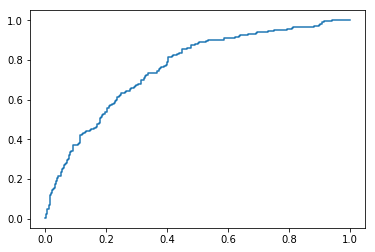

In [169]:
best_model=grid_search.best_estimator_

best_model.fit(X_train, y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  best_model.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
this_err = metrics.auc(fpr,tpr)
this_err